# PROBLEM STATEMENT

Project is based on predicting the defaulting loans. The predictions are done by evaluating various factors that influence the repayment capacity of the loan applicant. The project aims to create a machine learning model which is highly accurate in predicting such defaults.

# DATA DESCRIPTION

Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates. The need for a better credit risk scoring model is also raised by these institutions. This warrants a study to estimate the determinants of vehicle loan default.
A financial institution has hired you to accurately predict the probability of loanee/borrower defaulting on a vehicle loan in the first EMI (Equated Monthly Instalments) on the due date. Following Information regarding the loan and loanee are provided:

1. Loanee Information (Demographic data like age, income, Identity proof etc.)
2. Loan Information (Disbursal details, amount, EMI, loan to value ratio etc.)
3. Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.)

Doing so will ensure that clients capable of repayment are not rejected and important determinants can be identified which can be further used for minimising the default rates.

# DATA DICTIONARY

**UniqueID** - Identifier for customers

**loan_default** - Amount of Loan disbursed

**disbursed_amount**- Amount of Loan disbursed

**asset_cost** - Cost of the Asset

**ltv** - Loan to Value of the asset

**branch_id**- Branch where the loan was disbursed

**supplier_id** - Vehicle Dealer where the loan was disbursed

**manufacturer_id** - Vehicle manufacturer(Hero, Honda, TVS etc.)

**Current_pincode** - Current pincode of the customer

**Date.of.Birth**- Date of birth of the customer

**Employment.Type**- Employment Type of the customer (Salaried/Self Employed)

**DisbursalDate** - Date of disbursement

**State_ID** - State of disbursement

**Employee_code_ID** - Employee of the organization who logged the disbursement

**MobileNo_Avl_Flag** - if Mobile no. was shared by the customer then flagged as 1

**Aadhar_flag** - if aadhar was shared by the customer then flagged as 1

**PAN_flag** - if pan was shared by the customer then flagged as 1

**VoterID_flag**- if voter  was shared by the customer then flagged as 1

**Driving_flag**- if DL was shared by the customer then flagged as 1

**Passport_flag** - if passport was shared by the customer then flagged as 1

**PERFORM_CNS.SCORE** - Bureau Score

**PERFORM_CNS.SCORE.DESCRIPTION** - Bureau score description

**PRI.NO.OF.ACCTS** - count of total loans taken by the customer at the time of disbursement

**PRI.ACTIVE.ACCTS** - count of active loans taken by the customer at the time of disbursement

**PRI.OVERDUE.ACCTS** - count of default accounts at the time of disbursement

**PRI.CURRENT.BALANCE** - total Principal outstanding amount of the active loans at the time of disbursement

**PRI.SANCTIONED.AMOUNT** - total amount that was sanctioned for all the loans at the time of disbursement

**PRI.DISBURSED.AMOUNT** - total amount that was disbursed for all the loans at the time of disbursement

**SEC.NO.OF.ACCTS** - count of total loans taken by the customer at the time of disbursement

**SEC.ACTIVE.ACCTS** - count of active loans taken by the customer at the time of disbursement

**SEC.OVERDUE.ACCTS** - count of default accounts at the time of disbursement

**SEC.CURRENT.BALANCE** - total Principal outstanding amount of the active loans at the time of disbursement

**SEC.SANCTIONED.AMOUNT** - total amount that was sanctioned for all the loans at the time of disbursement

**SEC.DISBURSED.AMOUNT** - total amount that was disbursed for all the loans at the time of disbursement

**PRIMARY.INSTAL.AMT** - EMI Amount of the primary loan

**SEC.INSTAL.AMT** - EMI Amount of the secondary loan

**NEW.ACCTS.IN.LAST.SIX.MONTHS** - New loans taken by the customer in last 6 months before the disbursment

**DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS** - Loans defaulted in the last 6 months

**AVERAGE.ACCT.AGE** - Average loan tenure

**CREDIT.HISTORY.LENGTH**- Time since first loan

**NO.OF_INQUIRIES** - Enquries done by the customer for loans


# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=[15,8]
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns=None

In [2]:
train=pd.read_csv('data.csv')
train.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [3]:
train.shape

(233154, 41)

In [4]:
train.dtypes

UNIQUEID                                 int64
DISBURSED_AMOUNT                         int64
ASSET_COST                               int64
LTV                                    float64
BRANCH_ID                                int64
SUPPLIER_ID                              int64
MANUFACTURER_ID                          int64
CURRENT_PINCODE_ID                       int64
DATE_OF_BIRTH                           object
EMPLOYMENT_TYPE                         object
DISBURSAL_DATE                          object
STATE_ID                                 int64
EMPLOYEE_CODE_ID                         int64
MOBILENO_AVL_FLAG                        int64
AADHAR_FLAG                              int64
PAN_FLAG                                 int64
VOTERID_FLAG                             int64
DRIVING_FLAG                             int64
PASSPORT_FLAG                            int64
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
PRI_NO_OF_ACC

In [5]:
train.describe()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


# DISTRIBUTION OF VARIABLES

UNIVARIATE ANALYSIS FOR NUMERIC VARIABLES

In [6]:
# List of Numerical columns
train.select_dtypes(include=[np.number]).columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'STATE_ID',
       'EMPLOYEE_CODE_ID', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG',
       'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
       'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS',
       'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT'],
      dtype='object')

The variables with ID's are not selected in the num_cols because they are all unique numbers which might disturb the accuracy of the model.

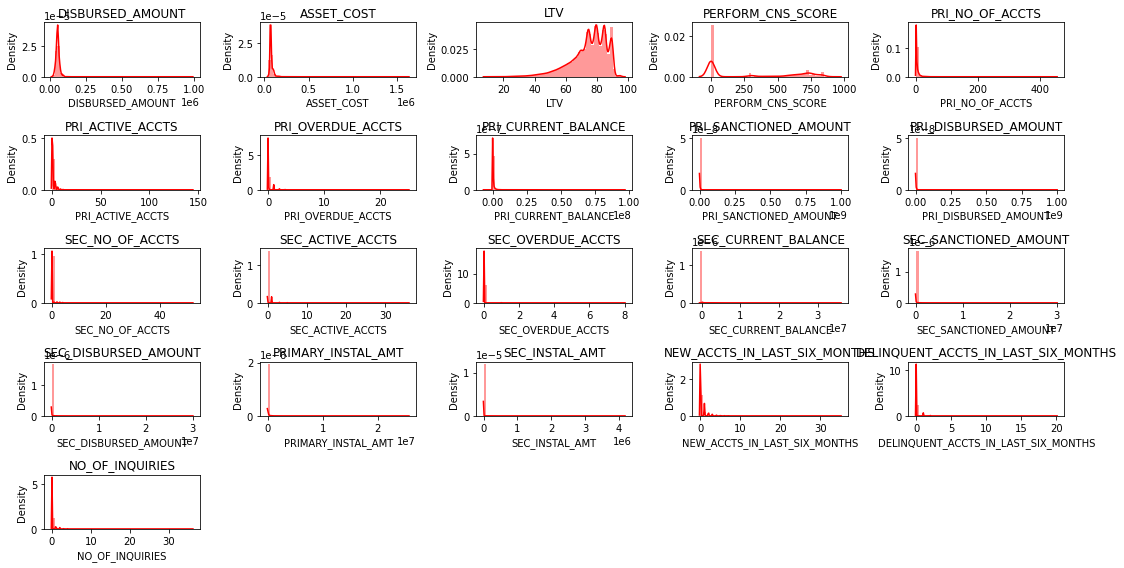

In [7]:
num_cols=['DISBURSED_AMOUNT','ASSET_COST','LTV','PERFORM_CNS_SCORE','PRI_NO_OF_ACCTS','PRI_ACTIVE_ACCTS','PRI_OVERDUE_ACCTS','PRI_CURRENT_BALANCE','PRI_SANCTIONED_AMOUNT','PRI_DISBURSED_AMOUNT','SEC_NO_OF_ACCTS','SEC_ACTIVE_ACCTS','SEC_OVERDUE_ACCTS','SEC_CURRENT_BALANCE','SEC_SANCTIONED_AMOUNT','SEC_DISBURSED_AMOUNT','PRIMARY_INSTAL_AMT','SEC_INSTAL_AMT','NEW_ACCTS_IN_LAST_SIX_MONTHS','DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS','NO_OF_INQUIRIES']
nrows=5
ncols=5
iterator=1
for i in num_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(train.loc[:,i],color='red')
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show()

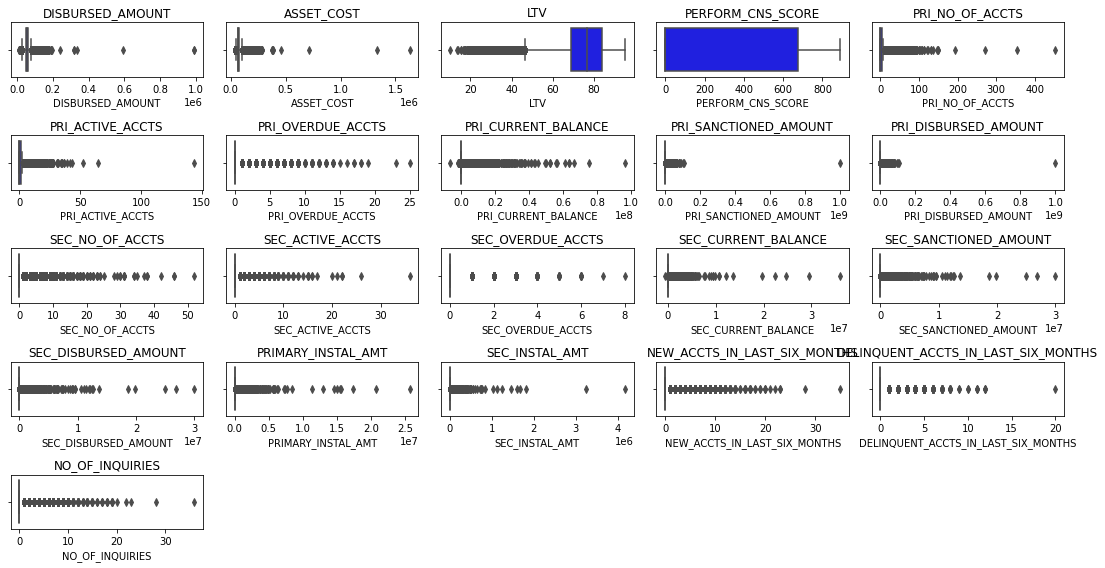

In [8]:
num_cols=['DISBURSED_AMOUNT','ASSET_COST','LTV','PERFORM_CNS_SCORE','PRI_NO_OF_ACCTS','PRI_ACTIVE_ACCTS','PRI_OVERDUE_ACCTS','PRI_CURRENT_BALANCE','PRI_SANCTIONED_AMOUNT','PRI_DISBURSED_AMOUNT','SEC_NO_OF_ACCTS','SEC_ACTIVE_ACCTS','SEC_OVERDUE_ACCTS','SEC_CURRENT_BALANCE','SEC_SANCTIONED_AMOUNT','SEC_DISBURSED_AMOUNT','PRIMARY_INSTAL_AMT','SEC_INSTAL_AMT','NEW_ACCTS_IN_LAST_SIX_MONTHS','DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS','NO_OF_INQUIRIES']
nrows=5
ncols=5
iterator=1
for i in num_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(train.loc[:,i],color='blue')
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show()

Above is the distribution plot for the numerical variables in the dataset.

1) The variable LTV is highly negatively skewed.

2) The variables DISBURSED_AMOUNT and ASSET_COST are highly positively skewed.

In [9]:
train.skew()

UNIQUEID                                -0.002262
DISBURSED_AMOUNT                         4.492240
ASSET_COST                               6.133485
LTV                                     -1.075766
BRANCH_ID                                1.027481
SUPPLIER_ID                             -0.168908
MANUFACTURER_ID                          0.388980
CURRENT_PINCODE_ID                       0.278185
STATE_ID                                 0.821971
EMPLOYEE_CODE_ID                         0.244313
MOBILENO_AVL_FLAG                        0.000000
AADHAR_FLAG                             -1.858117
PAN_FLAG                                 3.211462
VOTERID_FLAG                             2.017136
DRIVING_FLAG                             6.328475
PASSPORT_FLAG                           21.611957
PERFORM_CNS_SCORE                        0.445150
PRI_NO_OF_ACCTS                          9.744845
PRI_ACTIVE_ACCTS                         5.371850
PRI_OVERDUE_ACCTS                        7.512927


UNIVARIATE ANALYSIS FOR CATEGORICAL VARIABLES

In [10]:
# List of categorical columns
train.select_dtypes(include=[np.object]).columns

Index(['DATE_OF_BIRTH', 'EMPLOYMENT_TYPE', 'DISBURSAL_DATE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH'],
      dtype='object')

The variables DATE_OF_BIRTH,DISBURSAL_DATE,AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH will not be selected because they are in date format.

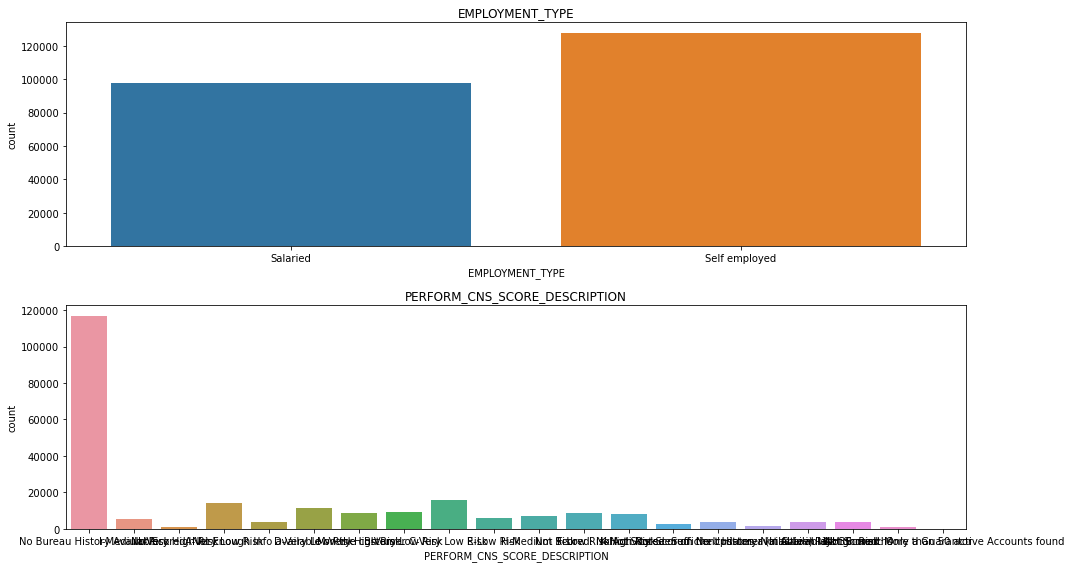

In [11]:
cat_cols=['EMPLOYMENT_TYPE','PERFORM_CNS_SCORE_DESCRIPTION']
nrows=2
ncols=1
iterator=1
for i in cat_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.countplot(train.loc[:,i])
    plt.title(i)
    iterator=iterator+1
plt.tight_layout()
plt.show()

Interpretation:
1) Self-employed customers have taken more loans as compared to salaried customers.

2) We can see a lot of categories in PERFORM_CNS_SCORE_DESCRIPTION column so we need to bin the categories accordingly.

In [12]:
print(train.PERFORM_CNS_SCORE_DESCRIPTION.unique())

['No Bureau History Available' 'I-Medium Risk' 'L-Very High Risk'
 'A-Very Low Risk' 'Not Scored: Not Enough Info available on the customer'
 'D-Very Low Risk' 'M-Very High Risk' 'B-Very Low Risk' 'C-Very Low Risk'
 'E-Low Risk' 'H-Medium Risk' 'F-Low Risk' 'K-High Risk'
 'Not Scored: No Activity seen on the customer (Inactive)'
 'Not Scored: Sufficient History Not Available'
 'Not Scored: No Updates available in last 36 months' 'G-Low Risk'
 'J-High Risk' 'Not Scored: Only a Guarantor'
 'Not Scored: More than 50 active Accounts found']


The column 'Performance CNS Score Description' are divided into various categories.
Therfore we are binning it into 4 categories which are:
'low risk', 'medium risk', 'high risk', 'no score'.

In [13]:
train = train.replace({'PERFORM_CNS_SCORE_DESCRIPTION':{'C-Very Low Risk':'Low', 'A-Very Low Risk':'Low',
                                                       'B-Very Low Risk':'Low', 'D-Very Low Risk':'Low',
                                                       'F-Low Risk':'Low', 'E-Low Risk':'Low', 'G-Low Risk':'Low',
                                                       'H-Medium Risk': 'Medium', 'I-Medium Risk': 'Medium',
                                                       'J-High Risk':'High', 'K-High Risk':'High','L-Very High Risk':'High',
                                                       'M-Very High Risk':'High','Not Scored: More than 50 active Accounts found':'Not Scored',
                                                       'Not Scored: Only a Guarantor':'Not Scored','Not Scored: Not Enough Info available on the customer':'Not Scored',
                                                        'Not Scored: No Activity seen on the customer (Inactive)':'Not Scored','Not Scored: No Updates available in last 36 months':'Not Scored',
                                                       'Not Scored: Sufficient History Not Available':'Not Scored', 'No Bureau History Available':'Not Scored'
                                                       }})

['Not Scored' 'Medium' 'High' 'Low']


<AxesSubplot:xlabel='PERFORM_CNS_SCORE_DESCRIPTION', ylabel='count'>

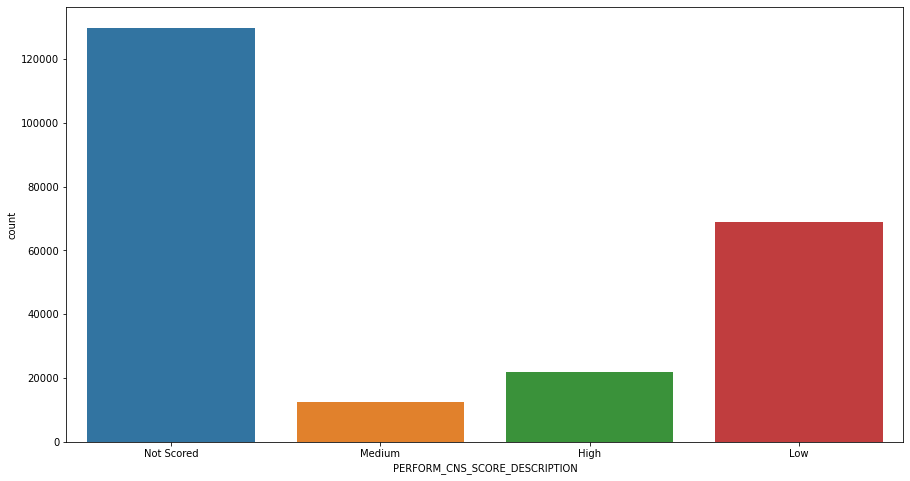

In [14]:
print(train.PERFORM_CNS_SCORE_DESCRIPTION.unique())
sns.countplot(train.PERFORM_CNS_SCORE_DESCRIPTION)

Interpretation: Customers with high risk may tend to default a loan more as compared to customers with low and medium risk.

BIVARIATE ANALYSIS

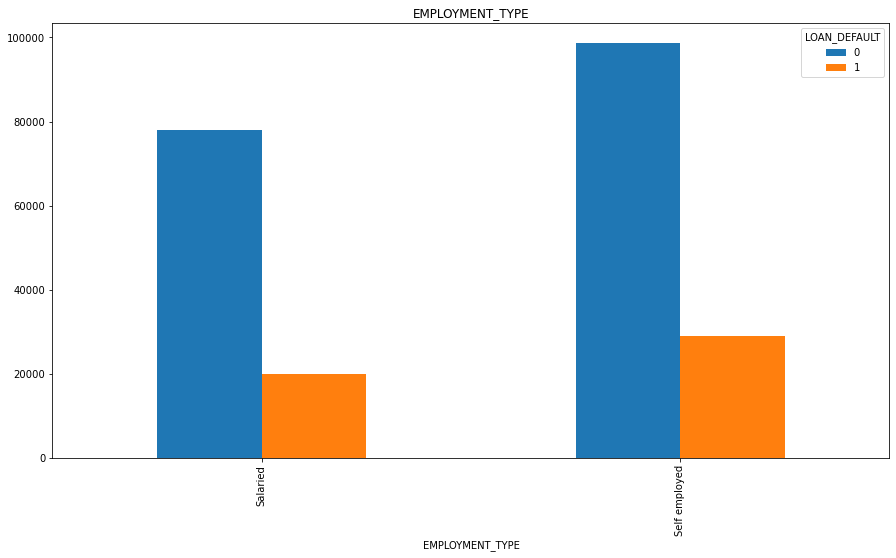

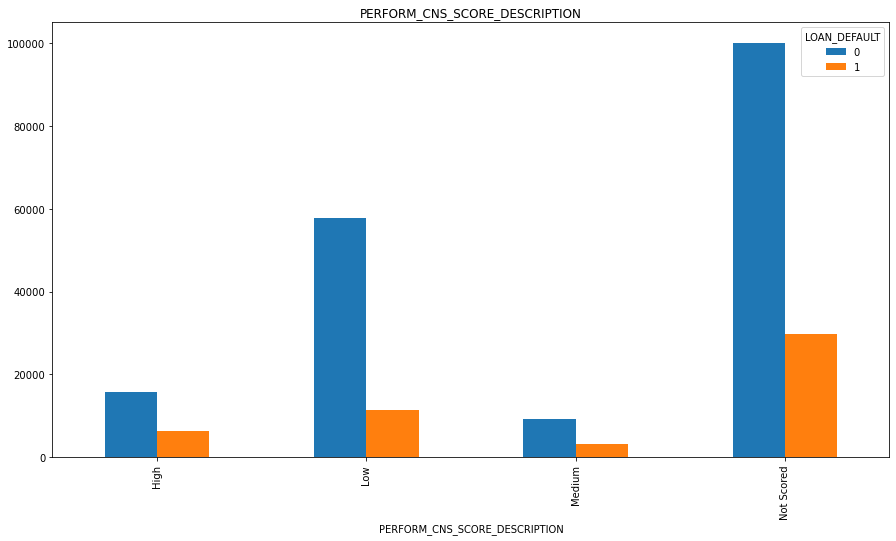

In [15]:
# For Categorical vs Categorical variables.
for i in cat_cols:
    pd.crosstab(train.loc[:,i],train.LOAN_DEFAULT).plot(kind='bar')
    plt.title(i)
    plt.show()

In [71]:
pd.crosstab(train.PERFORM_CNS_SCORE_DESCRIPTION,train.LOAN_DEFAULT)

LOAN_DEFAULT,0,1
PERFORM_CNS_SCORE_DESCRIPTION,,
High,15696,6239
Low,57638,11384
Medium,9239,3173
Not Scored,99970,29815


In [72]:
pd.crosstab(train.EMPLOYMENT_TYPE,train.LOAN_DEFAULT)

LOAN_DEFAULT,0,1
EMPLOYMENT_TYPE,,
Salaried,77948,19910
Self employed,98578,29057
Unknown,6017,1644


Above is the cross tabulation for categorical variables with the target variable plotted with a bar chart.

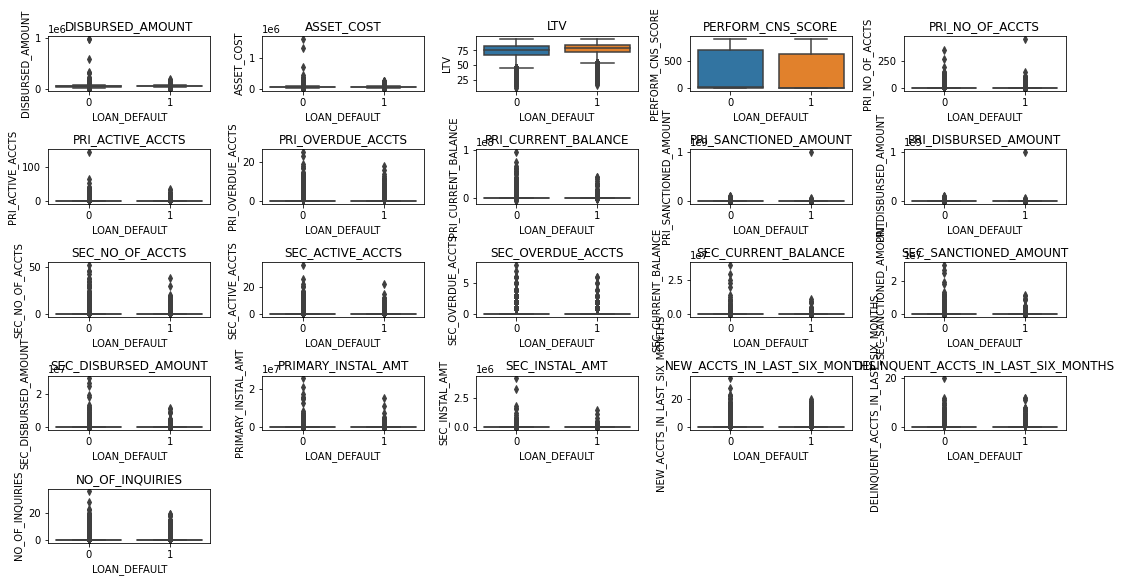

In [16]:
# For Categorical vs Numerical
nrows=5
ncols=5
iterator=1
for i in num_cols:
    plt.subplot(nrows,ncols,iterator)   
    sns.boxplot(train.LOAN_DEFAULT,train.loc[:,i])
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show()

Above is the boxplot for the numerical variables with our target variable (LOAN_DEFAULT). We can see that there are outliers in the dataset.

In the PERFORM_CNS_SCORE column the overall data lies in the range of 0-500.

# MISSING VALUE TREATMENT

In [17]:
Total = train.isnull().sum().sort_values(ascending = False)          

Percent = (train.isnull().sum()*100/train.isnull().count()).sort_values(ascending = False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
EMPLOYMENT_TYPE,7661,3.285811
UNIQUEID,0,0.000000
SEC_SANCTIONED_AMOUNT,0,0.000000
PRI_OVERDUE_ACCTS,0,0.000000
PRI_CURRENT_BALANCE,0,0.000000
PRI_SANCTIONED_AMOUNT,0,0.000000
PRI_DISBURSED_AMOUNT,0,0.000000
SEC_NO_OF_ACCTS,0,0.000000
SEC_ACTIVE_ACCTS,0,0.000000
SEC_OVERDUE_ACCTS,0,0.000000


Only the column EMPLOYMENT_TYPE has null values of 3.28% in the dataset.

In [18]:
train[train.EMPLOYMENT_TYPE.isnull()]

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
87,525234,52428,67405,81.60,78,17014,45,2099,05-08-1998,NaN,21-09-2018,4,1646,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
88,637252,51653,63896,86.08,78,17014,45,2079,24-02-1999,NaN,29-10-2018,4,1646,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
91,584433,49488,63306,83.72,78,17014,45,2069,27-11-1998,NaN,17-10-2018,4,1646,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
99,515149,40884,59313,70.81,78,17014,45,2099,24-02-1998,NaN,18-09-2018,4,1646,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
125,547112,49683,62577,83.10,78,17014,45,2099,01-01-1998,NaN,29-09-2018,4,1646,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231722,494458,43272,59313,74.86,78,17014,45,2093,03-03-1998,NaN,07-09-2018,4,218,1,1,0,0,0,0,763,Low,1,1,0,3927,27000,27000,0,0,0,0,0,0,1125,0,0,0,1yrs 10mon,1yrs 10mon,3,0
231737,419420,36750,62852,60.14,78,17014,45,2082,01-01-1998,NaN,03-08-2018,4,218,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
231756,553774,50683,67746,79.71,78,16803,86,2055,16-08-1999,NaN,30-09-2018,4,119,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
231767,594901,55728,74748,79.60,78,16803,86,2073,01-01-1999,NaN,21-10-2018,4,119,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


Since we have no other relevant column to fill the null values we will create a column called 'Unknown'.

In [19]:
train['EMPLOYMENT_TYPE']=train['EMPLOYMENT_TYPE'].fillna('Unknown')

In [20]:
train.EMPLOYMENT_TYPE.value_counts()

Self employed    127635
Salaried          97858
Unknown            7661
Name: EMPLOYMENT_TYPE, dtype: int64

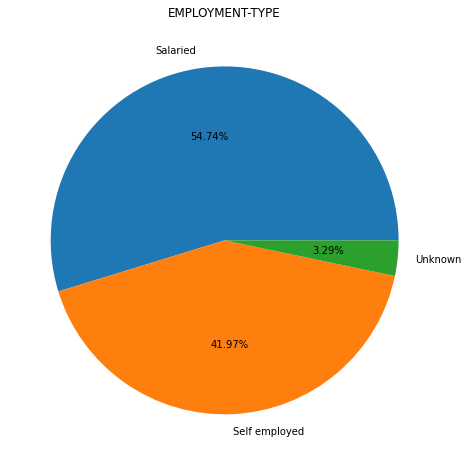

In [21]:
plt.pie(train['EMPLOYMENT_TYPE'].value_counts(),labels= train['EMPLOYMENT_TYPE'].unique(),autopct='%0.2f%%')
plt.title('EMPLOYMENT-TYPE')
plt.show()

# OUTLIER TREATMENT

There are outliers in the dataset but since it is a loan dataset, outliers should not be removed in order get a high accuracy.

# FEATURE ENGINEERING

In [22]:
train.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,6,1998,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,598,Medium,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,6,1998,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,6,1998,1,1,0,0,0,0,305,High,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


The formula of Loan To Value (LTV) ratio = (Loan Amount/ Asset Cost)*100. So we can create a column 'LOAN_AMOUNT' using this formula.

In [23]:
train['LOAN_AMOUNT']=(train['LTV']*train['ASSET_COST'])/100

In [24]:
train.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,LOAN_AMOUNT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,6,1998,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,52297.2000
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,598,Medium,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,48002.2650
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,6,1998,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,54996.9680
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,6,1998,1,1,0,0,0,0,305,High,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,58496.7824
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,53299.1700


Here the 'Average Account Age' and 'Credit History Length' column are given in years and months format.
Both of the columns are further converted in months format.

In [25]:
l = []
for items in train['AVERAGE_ACCT_AGE'].values: 
    y = int(items[0]) * 12
    if items[6]== 'm':
        m = int(items[5])
    else:
        m = int(items[5:7])
    total = y + m
    l.append(total)

train.loc[:, 'AVERAGE_ACCT_AGE'] = l

In [26]:
l = []
for items in train['CREDIT_HISTORY_LENGTH'].values: 
    y = int(items[0]) * 12
    if items[6]== 'm':
        m = int(items[5])
    else:
        m = int(items[5:7])
    total = y + m
    l.append(total)

train.loc[:, 'CREDIT_HISTORY_LENGTH'] = l

Here a new column Age is created by subtracting the disbursal amount with date of birth which represents the age of the loan applicant when the loan was disbursed.

In [27]:
train['DATE_OF_BIRTH'] = pd.to_datetime(train['DATE_OF_BIRTH'])
train['DISBURSAL_DATE'] = pd.to_datetime(train['DISBURSAL_DATE'])
train['Age']=(train.DISBURSAL_DATE-train.DATE_OF_BIRTH).apply(lambda x: str(x).split(' ')[0]).apply(lambda x: int(x)/365)
train['Age']=train['Age'].astype(int)

In [28]:
train.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,LOAN_AMOUNT,Age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-03-08,6,1998,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52297.2000,34
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,598,Medium,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,48002.2650,33
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-01-08,6,1998,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54996.9680,32
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,2018-10-26,6,1998,1,1,0,0,0,0,305,High,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,58496.7824,24
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,53299.1700,41


Categorizing the 'NO_OF_INQUIRIES' column into the following categories to check if it has any significance on the target variable.

In [29]:
train.NO_OF_INQUIRIES.unique()

array([ 0,  1,  4,  2,  3,  5,  6, 12,  9,  8, 18,  7, 19, 11, 10, 15, 14,
       17, 20, 13, 23, 28, 16, 22, 36], dtype=int64)

In [30]:
def enquiry(x):
    if x==0:
        return'No enquiry'
    elif(x>=1 and x<=10):
        return 'Less Frequent'
    elif(x>=11 and x<=20):
        return 'Frequent'
    else:
        return 'Very Frequent'

In [31]:
train['FREQUENCY_OF_INQUIRIES']=train['NO_OF_INQUIRIES'].apply(enquiry)

In [32]:
train.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,LOAN_AMOUNT,Age,FREQUENCY_OF_INQUIRIES
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-03-08,6,1998,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52297.2000,34,No enquiry
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,598,Medium,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,48002.2650,33,No enquiry
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-01-08,6,1998,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54996.9680,32,No enquiry
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,2018-10-26,6,1998,1,1,0,0,0,0,305,High,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,58496.7824,24,Less Frequent
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,53299.1700,41,Less Frequent


# FEATURE SELECTION

In [33]:
train.corr()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,LOAN_AMOUNT,Age
UNIQUEID,1.000000,0.145575,0.144671,-0.030537,-0.004509,0.025747,-0.021514,0.030500,-0.057734,0.075983,NaN,-0.001372,-0.014291,0.008201,-0.026072,-0.001382,-0.014016,-0.013584,-0.020862,-0.007915,-0.007259,-0.002910,-0.002563,-0.044180,-0.039888,-0.027486,-0.013428,-0.017114,-0.016857,-0.009321,-0.013518,-0.003842,-0.009186,-0.010569,-0.014599,0.016537,0.033848,0.136067,0.011566
DISBURSED_AMOUNT,0.145575,1.000000,0.752668,0.376747,0.018328,0.078596,0.095203,0.068540,-0.023956,0.010120,NaN,-0.015589,0.014490,0.011665,0.001381,0.008291,0.011409,0.034461,0.039542,0.019422,0.015713,0.006294,0.006412,-0.014916,-0.014275,-0.007305,-0.004227,-0.005271,-0.005119,0.002350,-0.005525,0.035880,0.020198,0.004290,0.015726,0.038513,0.077675,0.998140,-0.059174
ASSET_COST,0.144671,0.752668,1.000000,-0.301188,0.018586,0.150002,-0.005256,0.275878,-0.026348,0.008711,NaN,-0.093716,0.048075,0.083899,0.020484,0.005542,-0.047398,-0.026798,-0.021692,-0.014782,-0.004356,-0.001180,-0.001221,-0.022600,-0.020359,-0.013455,-0.008697,-0.010776,-0.010594,-0.004356,-0.005738,-0.021968,-0.007932,-0.015932,-0.021732,-0.017301,0.014261,0.757798,-0.117627
LTV,-0.030537,0.376747,-0.301188,1.000000,0.006382,-0.103732,0.121003,-0.300112,0.004882,0.004940,NaN,0.106953,-0.037786,-0.098393,-0.024060,0.004467,0.084993,0.086571,0.087929,0.051770,0.026714,0.009955,0.010177,0.013019,0.010565,0.010256,0.007195,0.008800,0.008733,0.007358,0.000481,0.083824,0.041921,0.030189,0.054580,0.085725,0.098208,0.372734,0.080628
BRANCH_ID,-0.004509,0.018328,0.018586,0.006382,1.000000,0.225744,-0.049957,0.048192,0.187782,0.088764,NaN,-0.036384,0.030206,0.021387,-0.015503,-0.008537,-0.018049,-0.010384,-0.006403,-0.005546,-0.004133,-0.003370,-0.003412,-0.003194,-0.001957,-0.007104,0.001418,0.002404,0.002457,0.004955,0.004265,-0.008354,-0.001730,0.005171,0.000286,-0.001813,0.030193,0.019762,-0.002444
SUPPLIER_ID,0.025747,0.078596,0.150002,-0.103732,0.225744,1.000000,-0.063916,0.187401,0.105502,0.095792,NaN,-0.081161,0.036804,0.079355,-0.015682,-0.008773,-0.077029,-0.070536,-0.066930,-0.042692,-0.022582,-0.012959,-0.012950,-0.025809,-0.019885,-0.015665,-0.008729,-0.010175,-0.010031,-0.011953,-0.005826,-0.053264,-0.024622,-0.034593,-0.052136,-0.030988,0.027357,0.077948,-0.033331
MANUFACTURER_ID,-0.021514,0.095203,-0.005256,0.121003,-0.049957,-0.063916,1.000000,-0.104349,0.026412,-0.045009,NaN,0.041251,-0.029272,-0.046489,0.004777,0.016338,0.073012,0.068371,0.065589,0.025992,0.031722,0.017242,0.017080,0.008392,0.005898,0.008152,0.003106,0.003206,0.003301,0.014116,0.003020,0.050079,0.019438,0.042813,0.056295,0.010012,-0.025039,0.090859,0.055907
CURRENT_PINCODE_ID,0.030500,0.068540,0.275878,-0.300112,0.048192,0.187401,-0.104349,1.000000,0.047903,-0.042609,NaN,-0.309285,0.041118,0.281934,0.039667,-0.008913,-0.161664,-0.084687,-0.117882,-0.062177,-0.055948,-0.025843,-0.025697,-0.051766,-0.049852,-0.036228,-0.021048,-0.026059,-0.025630,0.002275,-0.006305,-0.100080,-0.057419,-0.063801,-0.089173,-0.058821,0.028419,0.076528,-0.069728
STATE_ID,-0.057734,-0.023956,-0.026348,0.004882,0.187782,0.105502,0.026412,0.047903,1.000000,0.117309,NaN,-0.169882,0.113939,0.151839,0.027886,-0.000915,-0.042323,-0.008704,-0.021061,-0.012381,-0.006359,-0.004304,-0.004129,0.031245,0.032142,0.015679,0.013231,0.017842,0.017651,0.015843,0.009850,-0.014942,-0.000655,-0.008205,-0.009873,-0.016129,0.048075

From the above correlation plot, we can see that these variables are highly correlated:
1) PRI_NO_OF_ACCTS and PRI_ACTIVE_ACCTS

2) SEC_NO_OF_ACCTS and SEC_ACTIVE_ACCTS

3) AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH

In [34]:
print(train.PRI_NO_OF_ACCTS.corr(train.PRI_ACTIVE_ACCTS))
print(train.SEC_NO_OF_ACCTS.corr(train.SEC_ACTIVE_ACCTS))
print(train.AVERAGE_ACCT_AGE.corr(train.CREDIT_HISTORY_LENGTH))

0.7535649886665559
0.828726554584562
0.7845128100275405


From the above, we can remove the below columns from the feature set in order to decrease multicolinearity.
1) PRI_NO_OF_ACCTS

2) SEC_NO_OF_ACCTS

3) AVERAGE_ACCT_AGE

In [35]:
train2=train.copy()

In [36]:
train=train.drop(['PRI_NO_OF_ACCTS','SEC_NO_OF_ACCTS','AVERAGE_ACCT_AGE'],axis=1)

In [37]:
train.head(2)

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,LOAN_AMOUNT,Age,FREQUENCY_OF_INQUIRIES
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-03-08,6,1998,1,1,0,0,0,0,0,Not Scored,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52297.200,34,No enquiry
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,598,Medium,1,1,27600,50200,50200,0,0,0,0,0,1991,0,0,1,23,0,1,48002.265,33,No enquiry


# HYPOTHESIS TESTING

Let us find those statistically significant variables which are actually impacting our target variable LOAN_DAFAULT.

In [38]:
train.select_dtypes(include=[np.number]).columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'STATE_ID',
       'EMPLOYEE_CODE_ID', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG',
       'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT',
       'LOAN_AMOUNT', 'Age'],
      dtype='object')

In [39]:
num_final=['DISBURSED_AMOUNT','ASSET_COST','LTV','PERFORM_CNS_SCORE','PRI_ACTIVE_ACCTS','PRI_OVERDUE_ACCTS','PRI_CURRENT_BALANCE','PRI_SANCTIONED_AMOUNT','PRI_DISBURSED_AMOUNT','SEC_ACTIVE_ACCTS','SEC_OVERDUE_ACCTS','SEC_CURRENT_BALANCE','SEC_SANCTIONED_AMOUNT','SEC_DISBURSED_AMOUNT','PRIMARY_INSTAL_AMT','SEC_INSTAL_AMT','NEW_ACCTS_IN_LAST_SIX_MONTHS','DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS','CREDIT_HISTORY_LENGTH','NO_OF_INQUIRIES','LOAN_DEFAULT','LOAN_AMOUNT', 'Age']
len(num_final)

23

Using ANOVA test we will find which all numerical variables are statistically significant with the categorical target variable.

In [40]:
import scipy.stats as stats
signif_num=[]
for i in num_final:
    zero=train.loc[train.LOAN_DEFAULT==0,i]
    one=train.loc[train.LOAN_DEFAULT==1,i]
    teststats,pvalue=stats.ttest_ind(zero,one)
    print('Pvalue for',i,'is',pvalue)
    if pvalue<0.05:
        signif_num.append(i)

Pvalue for DISBURSED_AMOUNT is 8.74561717585509e-309
Pvalue for ASSET_COST is 5.716223071536896e-12
Pvalue for LTV is 0.0
Pvalue for PERFORM_CNS_SCORE is 1.869421119257312e-172
Pvalue for PRI_ACTIVE_ACCTS is 3.448627479875517e-89
Pvalue for PRI_OVERDUE_ACCTS is 9.138488408377107e-87
Pvalue for PRI_CURRENT_BALANCE is 6.221337646272035e-40
Pvalue for PRI_SANCTIONED_AMOUNT is 4.798158421546997e-08
Pvalue for PRI_DISBURSED_AMOUNT is 7.176942237800462e-08
Pvalue for SEC_ACTIVE_ACCTS is 0.003805646152419518
Pvalue for SEC_OVERDUE_ACCTS is 0.5081054926877384
Pvalue for SEC_CURRENT_BALANCE is 0.0075643427363124875
Pvalue for SEC_SANCTIONED_AMOUNT is 0.002153062273491789
Pvalue for SEC_DISBURSED_AMOUNT is 0.0025523226185338705
Pvalue for PRIMARY_INSTAL_AMT is 2.958254960232989e-07
Pvalue for SEC_INSTAL_AMT is 0.4546434321302706
Pvalue for NEW_ACCTS_IN_LAST_SIX_MONTHS is 9.30229371021266e-46
Pvalue for DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS is 3.2892517686894386e-62
Pvalue for CREDIT_HISTORY_LENGTH

In [41]:
len(signif_num)

21

In [42]:
train.select_dtypes(include=[np.object]).columns

Index(['EMPLOYMENT_TYPE', 'PERFORM_CNS_SCORE_DESCRIPTION',
       'FREQUENCY_OF_INQUIRIES'],
      dtype='object')

In [43]:
cat_final=['EMPLOYMENT_TYPE', 'PERFORM_CNS_SCORE_DESCRIPTION','FREQUENCY_OF_INQUIRIES']

Using the chisquare contingency test, we will find those categorical variables which are statistically significant with our target categorical variable LOAN_DEFAULT.

In [44]:
from scipy.stats import chi2_contingency
signif_cat=[]
for i in cat_final:
    table=pd.crosstab(train.loc[:,i],train.LOAN_DEFAULT)
    teststats,pvalue,df,exp_freq=stats.chi2_contingency(table)
    print('Pvalue for',i,'is',pvalue)
    if(pvalue<0.05):
        signif_cat.append(i)

Pvalue for EMPLOYMENT_TYPE is 3.1225422343284505e-42
Pvalue for PERFORM_CNS_SCORE_DESCRIPTION is 0.0
Pvalue for FREQUENCY_OF_INQUIRIES is 9.403098838347055e-79


In [45]:
len(signif_cat)

3

Consolidating all the features and create a final data

In [46]:
signif_cat+signif_num

['EMPLOYMENT_TYPE',
 'PERFORM_CNS_SCORE_DESCRIPTION',
 'FREQUENCY_OF_INQUIRIES',
 'DISBURSED_AMOUNT',
 'ASSET_COST',
 'LTV',
 'PERFORM_CNS_SCORE',
 'PRI_ACTIVE_ACCTS',
 'PRI_OVERDUE_ACCTS',
 'PRI_CURRENT_BALANCE',
 'PRI_SANCTIONED_AMOUNT',
 'PRI_DISBURSED_AMOUNT',
 'SEC_ACTIVE_ACCTS',
 'SEC_CURRENT_BALANCE',
 'SEC_SANCTIONED_AMOUNT',
 'SEC_DISBURSED_AMOUNT',
 'PRIMARY_INSTAL_AMT',
 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
 'CREDIT_HISTORY_LENGTH',
 'NO_OF_INQUIRIES',
 'LOAN_DEFAULT',
 'LOAN_AMOUNT',
 'Age']

In [47]:
final_data=train.loc[:,signif_cat+signif_num]
final_data.columns

Index(['EMPLOYMENT_TYPE', 'PERFORM_CNS_SCORE_DESCRIPTION',
       'FREQUENCY_OF_INQUIRIES', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV',
       'PERFORM_CNS_SCORE', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
       'SEC_ACTIVE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT',
       'LOAN_AMOUNT', 'Age'],
      dtype='object')

In [48]:
train3=final_data.copy()

We can drop 'NO_OF_INQUIRIES' column as we created a new column 'FREQUENCY_OF_INQUIRIES' using feature engineering.

In [49]:
final_data=final_data.drop('NO_OF_INQUIRIES',axis=1)

In [50]:
final_data.head()

,EMPLOYMENT_TYPE,PERFORM_CNS_SCORE_DESCRIPTION,FREQUENCY_OF_INQUIRIES,DISBURSED_AMOUNT,ASSET_COST,LTV,PERFORM_CNS_SCORE,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_ACTIVE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,LOAN_DEFAULT,LOAN_AMOUNT,Age
0,Salaried,Not Scored,No enquiry,50578,58400,89.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52297.2000,34
1,Self employed,Medium,No enquiry,47145,65550,73.23,598,1,1,27600,50200,50200,0,0,0,0,1991,0,1,23,1,48002.2650,33
2,Self employed,Not Scored,No enquiry,53278,61360,89.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54996.9680,32
3,Self employed,High,Less Frequent,57513,66113,88.48,305,0,0,0,0,0,0,0,0,0,31,0,0,15,1,58496.7824,24
4,Self employed,Not Scored,Less Frequent,52378,60300,88.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,53299.1700,41


Therefore our final data is ready for encoding and scaling.

# ENCODING THE CATEGORICAL VARIABLES

We will encode the categorical variables using ONE-HOT ENCODING technique.

In [51]:
df_cat=final_data.select_dtypes(include=[np.object])
dum = pd.get_dummies(df_cat.EMPLOYMENT_TYPE, drop_first=True)
df_cat.PERFORM_CNS_SCORE_DESCRIPTION.replace({"Not Scored":0,"Medium":2,"Low":1,"High":3},inplace=True)
df_cat.FREQUENCY_OF_INQUIRIES.replace({"No enquiry":0,"Less Frequent":1,"Frequent":2,"Very Frequent":3},inplace=True)
dum = pd.get_dummies(df_cat,drop_first=True)

# SCALING THE NUMERICAL VARIABLES

In [52]:
df_num=final_data.select_dtypes(include=[np.number]).drop('LOAN_DEFAULT',axis=1)

In [53]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
num_scaled=ss.fit_transform(df_num)
df_num_scaled=pd.DataFrame(data=num_scaled,columns=df_num.columns)
x1 = pd.concat([df_num_scaled,dum],axis=1)
x1.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,PERFORM_CNS_SCORE,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_ACTIVE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,LOAN_AMOUNT,Age,PERFORM_CNS_SCORE_DESCRIPTION,FREQUENCY_OF_INQUIRIES,EMPLOYMENT_TYPE_Self employed,EMPLOYMENT_TYPE_Unknown
0,-0.291335,-0.921895,1.292133,-0.855453,-0.535617,-0.285264,-0.176064,-0.092010,-0.091711,-0.087651,-0.031884,-0.039835,-0.039323,-0.086581,-0.399782,-0.253566,-0.639944,-0.284992,0.008337,0,0,0,0
1,-0.555997,-0.544482,-0.132372,0.911822,-0.020549,1.536941,-0.146773,-0.070871,-0.070599,-0.087651,-0.031884,-0.039835,-0.039323,-0.073427,-0.399782,2.347632,0.429956,-0.610911,-0.093376,2,0,1,0
2,-0.083183,-0.765651,1.299116,-0.855453,-0.535617,-0.285264,-0.176064,-0.092010,-0.091711,-0.087651,-0.031884,-0.039835,-0.039323,-0.086581,-0.399782,-0.253566,-0.639944,-0.080121,-0.195089,0,0,1,0
3,0.243307,-0.514764,1.198738,0.045917,-0.535617,-0.285264,-0.176064,-0.092010,-0.091711,-0.087651,-0.031884,-0.039835,-0.039323,-0.086376,-0.399782,-0.253566,0.057816,0.185461,-1.008792,3,1,1,0
4,-0.152567,-0.821604,1.190882,-0.855453,-0.535617,-0.285264,-0.176064,-0.092010,-0.091711,-0.087651,-0.031884,-0.039835,-0.039323,-0.086581,-0.399782,-0.253566,-0.639944,-0.208958,0.720326,0,1,1,0


<AxesSubplot:xlabel='LOAN_DEFAULT', ylabel='count'>

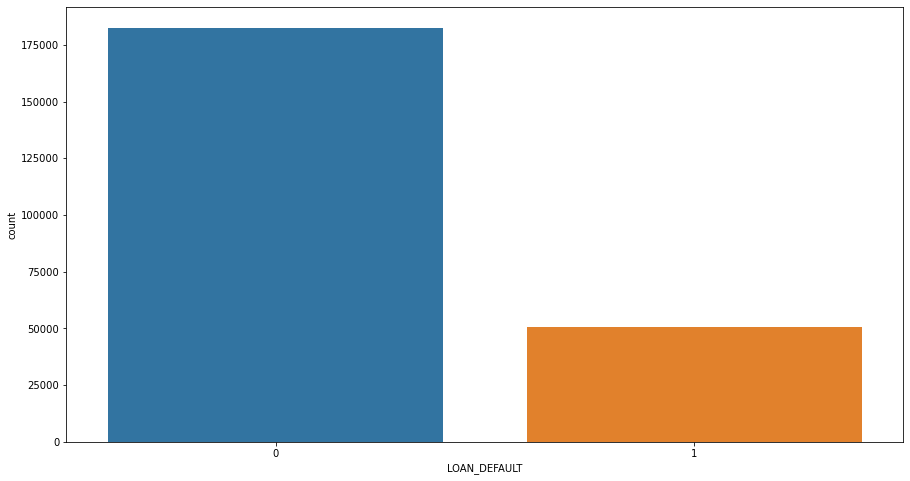

In [54]:
# Target variable
y=final_data['LOAN_DEFAULT']
sns.countplot(y)

The target variable seems to be imbalanced therefore SMOT analysis will be used.

# CLASSIFICATION MODELS 

In [55]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
newX1,newY1=smote.fit_resample(x1,y)

In [56]:
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#   Logistic Regression

In [57]:
X_log=newX1.copy()
y_log=newY1.copy()
X_log=sm.add_constant(X_log)
X_log_train,X_log_test,y_log_train,y_log_test=train_test_split(X_log,y_log,test_size=0.3,random_state=0)

In [58]:
#Build a model
logreg=sm.Logit(y_log_train,X_log_train).fit(method='bfgs')
print(logreg.summary())

         Current function value: 0.670533
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


C:\Users\atuladmin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:           LOAN_DEFAULT   No. Observations:               255560
Model:                          Logit   Df Residuals:                   255536
Method:                           MLE   Df Model:                           23
Date:                Fri, 06 Jan 2023   Pseudo R-squ.:                 0.03262
Time:                        14:33:20   Log-Likelihood:            -1.7136e+05
converged:                      False   LL-Null:                   -1.7714e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.2907      0.009    -33.974      0.000      -0.307      -0.274
DISBURSED_AMOUNT                        0.0318      0.07

Above is a Logistic Regression model with a poor Psuedo Rsquared value. But the advantages of Logistic Regression model is that it gives the log of odds of each variable, with the target variable.

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

Let us try other classification models to obtain the model with best accuracy and recall rate.

# Random Forest Classifier

In [60]:
newX_train,newX_test,newY_train,newY_test=train_test_split(newX1,newY1,test_size=0.3,random_state=0)
rf=RandomForestClassifier()
rf_model=rf.fit(newX_train,newY_train)
newY_pred=rf_model.predict(newX_test)
print(classification_report(newY_test,newY_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81     54923
           1       0.81      0.80      0.80     54603

    accuracy                           0.80    109526
   macro avg       0.80      0.80      0.80    109526
weighted avg       0.80      0.80      0.80    109526



In [61]:
rf=RandomForestClassifier()
rf_model=rf.fit(newX_train,newY_train)
newY_pred=rf_model.predict(newX_train)
print(classification_report(newY_train,newY_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127620
           1       1.00      1.00      1.00    127940

    accuracy                           1.00    255560
   macro avg       1.00      1.00      1.00    255560
weighted avg       1.00      1.00      1.00    255560



The Random Forest Classifier model is overfitting.

# Decision Tree Classifier

In [62]:
dt=DecisionTreeClassifier()
dt_model=dt.fit(newX_train,newY_train)
newY_pred=dt_model.predict(newX_test)
print(classification_report(newY_test,newY_pred))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70     54923
           1       0.70      0.72      0.71     54603

    accuracy                           0.70    109526
   macro avg       0.70      0.70      0.70    109526
weighted avg       0.70      0.70      0.70    109526



# K-Nearest Neighbor Classifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn_model=knn.fit(newX_train,newY_train)
newY_pred=knn_model.predict(newX_test)
print(classification_report(newY_test,newY_pred))

              precision    recall  f1-score   support

           0       0.80      0.58      0.67     54923
           1       0.67      0.86      0.75     54603

    accuracy                           0.72    109526
   macro avg       0.74      0.72      0.71    109526
weighted avg       0.74      0.72      0.71    109526



# Gradient Boosting Classifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb_model=gb.fit(newX_train,newY_train)
newY_pred=gb_model.predict(newX_test)
print(classification_report(newY_test,newY_pred))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67     54923
           1       0.67      0.72      0.69     54603

    accuracy                           0.68    109526
   macro avg       0.69      0.68      0.68    109526
weighted avg       0.69      0.68      0.68    109526



#  Extreme Gradient Boosting Classifier

In [65]:
from xgboost import XGBClassifier
xgboost=XGBClassifier()
xgboost_model=xgboost.fit(newX_train,newY_train)
newY_pred=xgboost_model.predict(newX_test)
print(classification_report(newY_test,newY_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82     54923
           1       0.87      0.70      0.77     54603

    accuracy                           0.80    109526
   macro avg       0.81      0.80      0.79    109526
weighted avg       0.81      0.80      0.79    109526



# HYPERPARAMETER TUNING

Out of all the models we constructed, we decided to utilise the KNearest Neighbor (KNN) model as our final model because it has the highest recall (86% for category 1) and a good accuracy (72%), and because we can increase the model's overall effectiveness by modifying its hyperparameters.

In [66]:
from sklearn.model_selection import GridSearchCV
knn_grid=KNeighborsClassifier()

In [67]:
grid_params = ({ 'n_neighbors' : [1,2,3,4]})

In [68]:
grid=GridSearchCV(estimator=knn_grid,param_grid=grid_params,cv=3,scoring='accuracy')
grid_model=grid.fit(newX_train,newY_train)
print('Tuned hyperparamters are ',grid_model.best_params_)

Tuned hyperparamters are  {'n_neighbors': 1}


Recreating the model with the new tuned hyperparameters.

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn_tuned=KNeighborsClassifier(n_neighbors=1)
knn_tuned_model=knn_tuned.fit(newX_train,newY_train)
newY_pred=knn_tuned_model.predict(newX_test)
print(classification_report(newY_test,newY_pred))

              precision    recall  f1-score   support

           0       0.87      0.68      0.77     54923
           1       0.74      0.90      0.81     54603

    accuracy                           0.79    109526
   macro avg       0.81      0.79      0.79    109526
weighted avg       0.81      0.79      0.79    109526



INTERPRETATION:

We were able to increase the recall rate for category 1 from 86% to 90% after the hyperparameter tuning procedure using GridSearchCV, and for category 0 from 57% to 68%.
Additionally, the model's accuracy increased from 72% to 79%. Therefore, this is a good model for our dataset for predicting vehicle loan defaults.